Now that you have seen a bit about how the PCA library works within scikit learn library and fit it to some hand written digits, we should take a closer look at what exactly PCA gives us back to work with and what these different parts mean.  Let's pick up where we left off in the last video.  Below I read in the libraries we used before, split off the image from the label, and I plotted the first 30 images in the dataset.

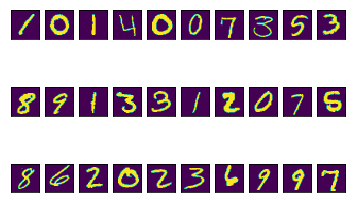

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from helper_functions import show_images, show_images_by_digit, fit_random_forest_classifier2 
from helper_functions import fit_random_forest_classifier, do_pca, plot_components

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#read in our dataset
train = pd.read_csv('./data/train.csv')
train.fillna(0, inplace=True)

# save the labels to a Pandas series target
y = train['label']
# Drop the label feature
train.fillna(0, inplace=True)
X = train.drop("label",axis=1)

show_images(30)

Now let's fit PCA with 15 components, and take a look at a few of the main features that live on the pca object we get back.

In [2]:
pca, X_pca = do_pca(15, X)

One of the main features to consider is something called the explained_variance_ratio. I created what's known as a scree_plot to show the explained_variance_ratio for each of the 15 components.

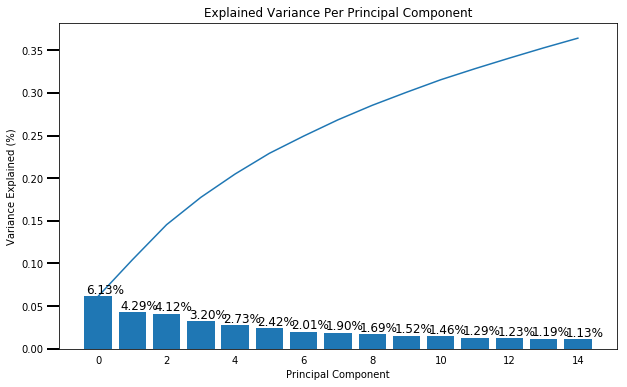

In [7]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    

scree_plot(pca)

Each of the bars represents the amount of variability explained by each component.  So you can see the first component explains 5.74% of the variability in the image data.  The second explains 4.11% of the variability and so on.  Often the number of components is chosen based on the total amount of variability explained by the components.  You can see that by using 15 components, we capture almost 35% of the total variability in the images.

Let's see if we can get a better idea of what aspects of the image the components might be picking up on.  To do this we will work with the components_ attribute of the pca object.  Looking at the shape of components shows us that each component gives the weights for each pixel.

 created a function below to plot the weights of each component in the form of the images. The darker portions of the image show

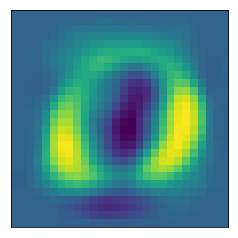

In [8]:
def plot_component(pca, comp):
    '''
    Plots an image associated with each component to understand how the weighting 
    of the components 
    INPUT: 
          pca - pca object created from PCA in sklearn
          comp - int - the component you want to see starting at 0
    OUTPUT
          None
    '''
    if comp <= len(pca.components_):
        mat_data = np.asmatrix(pca.components_[comp]).reshape(28,28)  #reshape images
        plt.imshow(mat_data); #plot the data
        plt.xticks([]) #removes numbered labels on x-axis
        plt.yticks([]) #removes numbered labels on y-axis   
    else:
        print('That is not the right input, please read the docstring before continuing.')
        
#Plot the first component
plot_component(pca, 0)

Looking at this image, it makes sense that only using two components was able to separate zero better than other digits when looking at this image. The highest weights are associated with pixels that look a lot like a zero.

### Practice

Above, you saw two of the main aspects of principal components:

1. **The amount of variability captured by the component.**
2. **The components themselves.**

In this notebook, you will get a chance to explore these a bit more yourself.  First, let's read in the necessary libraries, as well as the data.

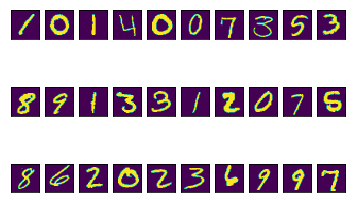

In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from helper_functions import show_images, do_pca, scree_plot, plot_component
import test_code as t

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#read in our dataset
train = pd.read_csv('./data/train.csv')
train.fillna(0, inplace=True)

# save the labels to a Pandas series target
y = train['label']
# Drop the label feature
X = train.drop("label",axis=1)

show_images(30)

`1.` Perform PCA on the **X** matrix using on your own or using the **do_pca** function from the **helper_functions** module. Reduce the original more than 700 features to only 10 principal components.

In [10]:
pca, X_pca = do_pca(10, X)

`2.` Now use the **scree_plot** function from the **helper_functions** module to take a closer look at the results of your analysis.

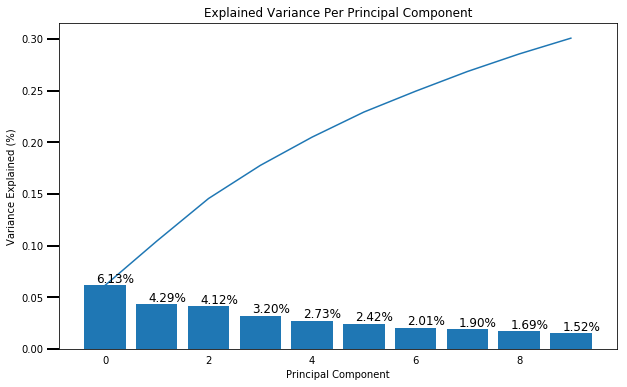

In [11]:
scree_plot(pca)

`3.` Using the results of your scree plot, match each letter as the value to the correct key in the **solution_three** dictionary.  Once you are confident in your solution run the next cell to see if your solution matches ours.

In [12]:
a = True
b = False
c = 6.13
d = 'The total amount of variability in the data explained by the first two principal components'
e = None

solution_three = {
    '10.42' : d, 
    'The first component will ALWAYS have the most amount of variability explained.': a,
    'The total amount of variability in the data explained by the first component': c,
    'The sum of the variability explained by all the components can be greater than 100%': b
}

In [13]:
#Run this cell to see if your solution matches ours
t.question_3_check(solution_three)

Looks good!  The amount of variability explained by each principal component gives us an idea of how much of the original variability in the original data is retained by each component.  Nice job matching these up!


`4.` Use the **plot_component** function from the **helper_functions** module to look at each of the components (remember they are 0 indexed).  Use the results to assist with question 5.

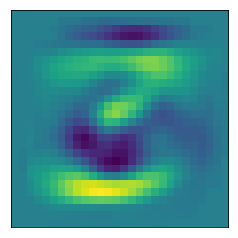

In [14]:
plot_component(pca, 3)

`5.` Using the results from viewing each of your principal component weights in question 4, change the following values of the **solution_five** dictionary to the **number of the index** for the principal component that best matches the description.  Once you are confident in your solution run the next cell to see if your solution matches ours.

In [15]:
solution_five = {
    'This component looks like it will assist in identifying zero': 0,
    'This component looks like it will assist in identifying three': 3
}

In [16]:
#Run this cell to see if your solution matches ours
t.question_5_check(solution_five)

Nice job!  That matches our solution as well!  The index of the first principal component appears to have really high weights where a zero would appear.  Alternatively, the fourth (third indexed component) appears to downweight where a three would appear to make it stand out.


From this notebook, you have had an opportunity to look at the two major parts of PCA:

`I.` The amount of **variance explained by each component**.  This is called an **eigenvalue**.

`II.` The principal components themselves, each component is a vector of weights.  In this case, the principal components help us understand which pixels of the image are most helpful in identifying the difference between between digits. **Principal components** are also known as **eigenvectors**.